
## OPTICS Clustering 

#### Mohammed A. Suaid
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences




_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Misael Morales, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/misaelmmorales/)


### Executive Summary


Clustering has been a powerful tool that detects patterns within datasets and groups them based on similarities. Multiple clustering methods exist, and learning about their functions helps us use the suitable method for our clustering needs. OPTICS (Ordering Points to Identify Cluster Structure) method is another opportunity to aid clustering certain types of data. In this workflow, OPTICS is used on different shapes of data to invistigate its advantages and disadvantages, and how to tune the hyperparameters. The results showed decent clusters for the different datasets used. I recommend using the reachability plot to tune the hyperparameters of OPTICS if the automatic outcome is not quite the desired result. 

### Import Packages



In [1]:
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import matplotlib.pyplot as plt           # for plotting
from sklearn.preprocessing import MinMaxScaler # min/max normalization
from sklearn.cluster import OPTICS, cluster_optics_dbscan        #OPTICS clustering
from sklearn.cluster import DBSCAN        # DBSCAN clustering
from sklearn.preprocessing import MinMaxScaler # min/max normalization
import matplotlib.gridspec as gridspec      #Grid space
import warnings
warnings.filterwarnings('ignore')         # ignore warnings

### Load Data

The following code block is created by Professor Michael Pyrcz (@GeostatsGuy). It allows the user to choose from different datasets from [GeostatsGuy GitHub](https://github.com/GeostatsGuy).

We will work with the following features:

* **porosity** - fraction of rock void in units of percentage.
* **Acoustic Impedence (AI)** - the product of porous media density through which the sound wave travels and the velocity of the sound wave $kg/m^2s*10^3$
* **Facies** - The characteristics of a rock unit that reflect its origin and permit its differentiation from other rock units around it.

We will load three different datasets and plot them to demonstrate OPTICS.

In [4]:
col = ['AI','Por','Facies']
units = ['kg/m2*10^3','%']
xlim = [0,7000]; ylim = [0,30]; xlabel = 'Acoustic Impedance (kg/m^2s*10^3)'; ylabel = 'Porosity (%)'
df = pd.read_csv(r'https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_Gaussian_mixture_v1.csv') 
df = df[[col[0],col[1],col[2]]]

df2 = pd.read_csv(r'https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/nonlinear_facies_v2.csv')  
df2 = df2[[col[0],col[1],col[2]]]

df3 = df2.drop(df2[df2.Facies == 2].index)
df3 = df3[[col[0],col[1],col[2]]]

Now let's take a look at the loaded datasets:

In [5]:
print(df.head())
print(df2.head())
print(df3.head())

            AI        Por  Facies
0  2942.043321  17.380049       0
1  2862.323981  17.473773       0
2  2843.042816  16.874080       0
3  2880.817908  17.117432       0
4  2864.390218  16.591956       0
           AI        Por  Facies
0  381.296221   8.980678       3
1  304.449932  10.135657       3
2  193.607906  16.150132       3
3  205.778123  13.696509       3
4  290.854794  13.132821       3
           AI        Por  Facies
0  381.296221   8.980678       3
1  304.449932  10.135657       3
2  193.607906  16.150132       3
3  205.778123  13.696509       3
4  290.854794  13.132821       3


### OPTICS Clustering

OPTICS (Ordering Points to Identify Clustering Structure) is basically a modified version of DBSCAN (Density-Based Spatial Clustering of Applications with Noise), where it finds a core sample of high density and expands clusters for them. However, OPTICS can extract clusters either automatically (using cluster_method = ‘xi’) or manually by using DBSCAN-like method (cluster_method = ‘dbscan’). OPTICS will extract clusters by first creating a reachability plot, although it can be fully automatic, epsilon hyperparameter can be an input as well to speed up the process or to enhance clustering. Exploring different types of clustering methods is helpful when it comes to the size and shape of datasets. Therefore, this workflow will demonstrate OPTICS clustering on different datasets. 

#### Automatic Method ('xi' parameter)
xi is also known as the contrast parameter. It computes the relative decrease in density and hence extracts clusters hierarchically based on the steepness of the reachability plot. 

More on OPTICS can be found in this paper that I used as a reference for this workflow.

#### Reference: 
Mihael Ankerst, Markus M. Breunig, Hans-Peter Kriegel, Joerg Sander (1999). OPTICS: Ordering Points To Identify the Clustering Structure. ACM SIGMOD international conference on Management of data. ACM Press. pp. doi:
https://dl.acm.org/doi/pdf/10.1145/304181.304187

### Normalization
Since our features have different magnitudes and variances, normalization comes in handy to remove the influence of having big differences in feature ranges.

The following code block is originally created by Professor Michael Pyrcz (@GeostatsGuy). [GeostatsGuy GitHub](https://github.com/GeostatsGuy).

The next code block will add two columns of normilized porosity and AI in each dataset:

In [6]:
transform = MinMaxScaler(); 
features = [col[0],col[1]]

df['n' + col[0]] = transform.fit_transform(df.loc[:,features].values)[:,0] # standardize the data features to mean = 0, var = 1.0
df['n' + col[1]] = transform.fit_transform(df.loc[:,features].values)[:,1] # standardize the data features to mean = 0, var = 1.0

df2['n' + col[0]] = transform.fit_transform(df2.loc[:,features].values)[:,0] # standardize the data features to mean = 0, var = 1.0
df2['n' + col[1]] = transform.fit_transform(df2.loc[:,features].values)[:,1] # standardize the data features to mean = 0, var = 1.0

df3['n' + col[0]] = transform.fit_transform(df3.loc[:,features].values)[:,0] # standardize the data features to mean = 0, var = 1.0
df3['n' + col[1]] = transform.fit_transform(df3.loc[:,features].values)[:,1] # standardize the data features to mean = 0, var = 1.0

print(df.head())
print(df2.head())
print(df3.head())

            AI        Por  Facies       nAI      nPor
0  2942.043321  17.380049       0  0.081379  0.827869
1  2862.323981  17.473773       0  0.062910  0.837060
2  2843.042816  16.874080       0  0.058444  0.778250
3  2880.817908  17.117432       0  0.067195  0.802115
4  2864.390218  16.591956       0  0.063389  0.750583
           AI        Por  Facies       nAI      nPor
0  381.296221   8.980678       3  0.312014  0.299356
1  304.449932  10.135657       3  0.247437  0.337855
2  193.607906  16.150132       3  0.154292  0.538338
3  205.778123  13.696509       3  0.164519  0.456550
4  290.854794  13.132821       3  0.236012  0.437761
           AI        Por  Facies       nAI      nPor
0  381.296221   8.980678       3  0.312014  0.299356
1  304.449932  10.135657       3  0.247437  0.337855
2  193.607906  16.150132       3  0.154292  0.538338
3  205.778123  13.696509       3  0.164519  0.456550
4  290.854794  13.132821       3  0.236012  0.437761


### Plotting Original Data
Plotting the original data with their interpreted facies/clusters helps in showing what kind of shape your data has and can be compared to the results of the clustering method

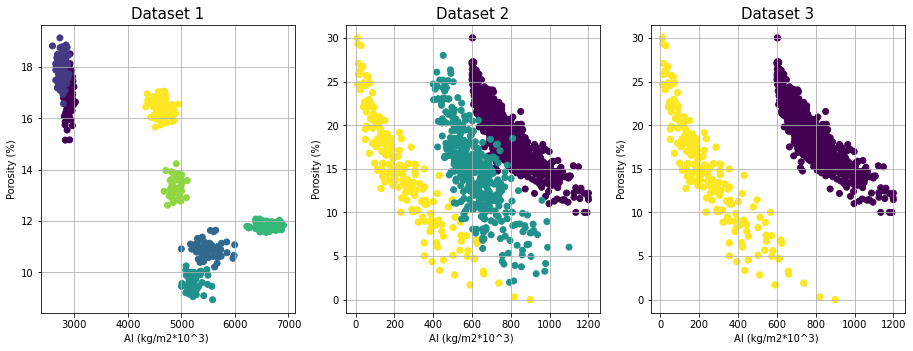

In [7]:
plt.subplot(131)
plt.scatter(df[col[0]],df[col[1]], c=df[col[2]])
plt.xlabel("AI (kg/m2*10^3) ")
plt.ylabel("Porosity (%)")
plt.title("Dataset 1", fontsize=15)
plt.grid()

plt.subplot(132)
plt.scatter(df2[col[0]],df2[col[1]], c=df2[col[2]])
plt.xlabel("AI (kg/m2*10^3) ")
plt.ylabel("Porosity (%)")
plt.title("Dataset 2", fontsize=15)
plt.grid()

plt.subplot(133)
plt.scatter(df3[col[0]],df3[col[1]], c=df3[col[2]])
plt.xlabel("AI (kg/m2*10^3) ")
plt.ylabel("Porosity (%)")
plt.title("Dataset 3", fontsize=15)
plt.grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)

### Reachability Plot
In order to understand OPTICS, visualizing what happens in the background helps a lot. Therefore, The following code block demonstrates the reachability plot and the OPTICS's automatic clustering 'xi', then we will recover it with different choices of epsilon distances. 

The following code is from Scikit Learn website and edited for Dataset1

Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_optics.html#sphx-glr-auto-examples-cluster-plot-optics-py

Let's do this for Dataset 1 only for now:

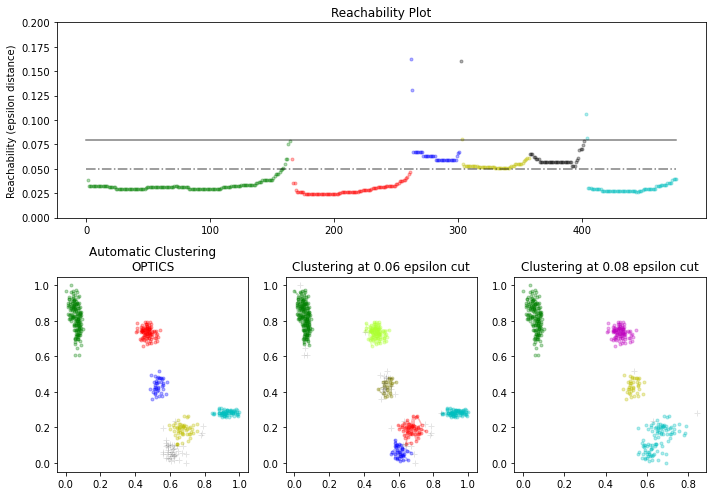

In [8]:
clust = OPTICS(min_samples=35, xi=0.05, min_cluster_size=0.05)
X = df[['n'+col[0],'n'+col[1]]].values
# Run the fit
clust.fit(X)

labels_050 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=0.06,
)
labels_200 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=0.08,
)

space = np.arange(len(df['n'+col[0]]))
                  
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.plot(space, np.full_like(space, 0.08, dtype=float), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 0.05, dtype=float), "k-.", alpha=0.5)
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_ylim(0,0.2)
ax1.set_title("Reachability Plot")


# OPTICS
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("Automatic Clustering\nOPTICS")

#  at 0.06
colors = ["g", "greenyellow", "olive", "r", "b", "c"]
for klass, color in zip(range(0, 6), colors):
    Xk = X[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker=".")
ax3.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], "k+", alpha=0.1)
ax3.set_title("Clustering at 0.06 epsilon cut")

#  at 0.08
colors = ["g.", "m.", "y.", "c."]
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(X[labels_200 == -1, 0], X[labels_200 == -1, 1], "k+", alpha=0.1)
ax4.set_title("Clustering at 0.08 epsilon cut")

plt.tight_layout()
plt.show()

Now, you know how OPTICS automatic clustering works, and how to tune the hyperparameter epsilon using the reachability plot in case the automatic outcome does not exactly captures the clusters you'd expect. Let's start applying OPTICS on our three sets of data.

### OPTICS for Dataset1

The following code blocks is orginally done by Professor Michael Pyrcz (@GeostatsGuy) SubsurfaceDataAnalytics_Clustering.ipynb and can be found here: [GeostatsGuy GitHub](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_Clustering.ipynb).

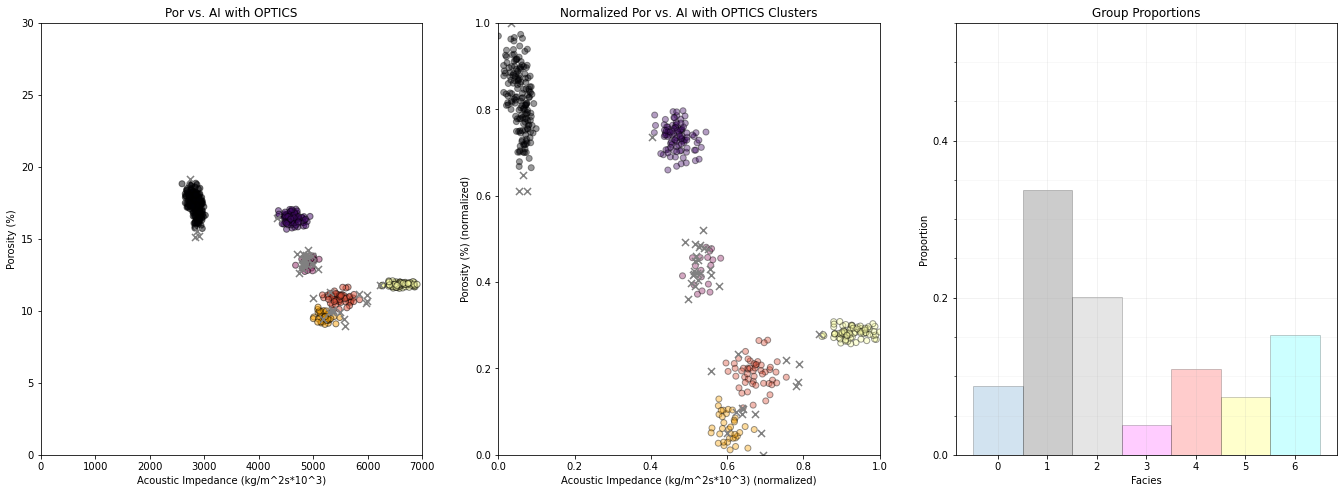

In [9]:
Optics = OPTICS(min_samples=35,  min_cluster_size=0.05, eps=0.06, cluster_method ='dbscan').fit(df[['n'+col[0],'n'+col[1]]].values)
df['OPTICS'] = Optics.labels_ + 1

cmap = plt.cm.inferno

plt.subplot(131)                          
df_in = df.loc[(df['OPTICS'] != 0)]
plt.scatter(df_in[col[0]], df_in[col[1]], c=df_in['OPTICS'], alpha=0.5, edgecolor='k', cmap = cmap)
df_outlier = df.loc[(df['OPTICS'] == 0)]
plt.scatter(df_outlier[col[0]],df_outlier[col[1]],c='grey',s = 50,marker = 'x',edgecolor='k',cmap = cmap)
plt.title(col[1] + ' vs. ' + col[0] + ' with OPTICS'); plt.xlabel(xlabel); plt.ylabel(ylabel)
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(132)                          # plot the training data and K prototypes
plt.scatter(df_in['n'+col[0]], df_in['n'+col[1]], c=df_in['OPTICS'], alpha = 0.4, linewidths=1.0, edgecolors="black", cmap = cmap)
plt.scatter(df_outlier['n'+col[0]],df_outlier['n'+col[1]],c='grey',s = 50,marker = 'x',edgecolor='k',cmap = cmap)
plt.title('Normalized ' + col[1] + ' vs. ' + col[0] + ' with OPTICS Clusters'); plt.xlabel(xlabel + ' (normalized)'); plt.ylabel(ylabel + ' (normalized)')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.2, top=1.2, wspace=0.2, hspace=0.2)

plt.subplot(133)
N, bins, patches  = plt.hist(df['OPTICS'],alpha=0.2,edgecolor="black",bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5],range=[0.5,2.5],density = True)
patches[1].set_facecolor('black'); patches[3].set_facecolor('magenta'); patches[4].set_facecolor('red')
patches[5].set_facecolor('yellow'); patches[6].set_facecolor('cyan'); patches[2].set_facecolor('gray');
plt.title('Group Proportions')
plt.xlabel('Facies')
plt.ylabel("Proportion")
ax = plt.gca()
ax.set_xticks(np.arange(0.0, 6.1, 1))
ax.set_yticks(np.arange(0, 0.6, 0.2))
ax.set_yticks(np.arange(0, 0.6, 0.05), minor=True)

#plt.grid(which = 'both',color = 'black',alpha = 0.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.2)
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.50, wspace=0.2, hspace=0.2)

Since we already done hyperparameter tuning using the reachability plot for this particular dataset, I used the hyperparameter directly in OPTICS clustering. The results are not perfect since we still have some outliers. However, it seems that facies are captured similarly to the original interpretations. 

### OPTICS for Dataset2

Dataset2 is much more harder to cluster due to its complex shape and the clusters are intertwined.

The following code blocks is orginally done by Professor Michael Pyrcz (@GeostatsGuy) SubsurfaceDataAnalytics_Clustering.ipynb and can be found here: [GeostatsGuy GitHub](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_Clustering.ipynb).

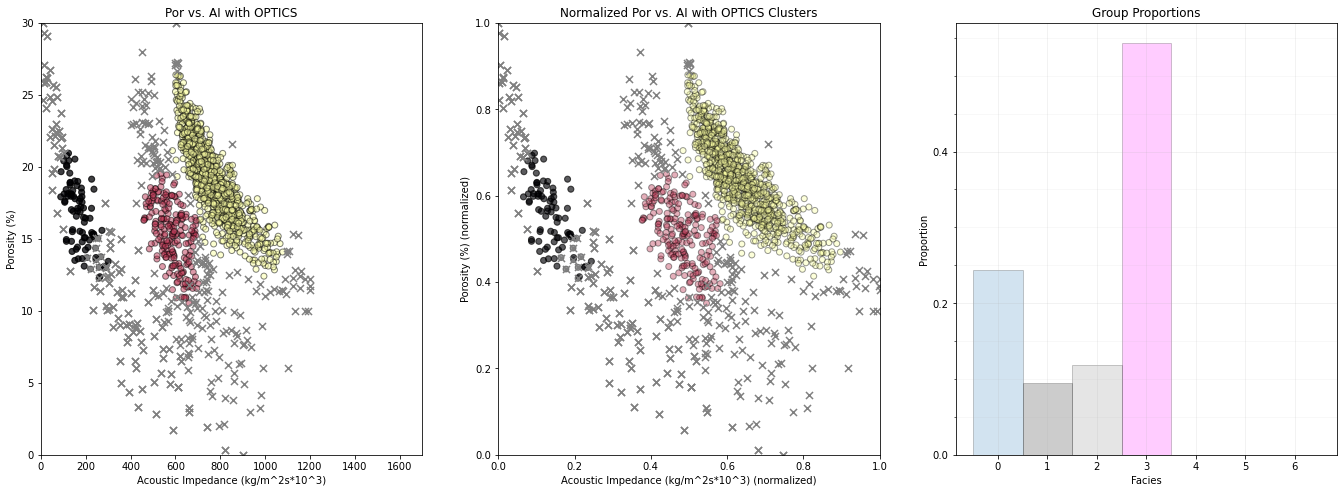

In [10]:
Optics = OPTICS(min_samples=40,  min_cluster_size=0.05, eps=0.05, cluster_method ='dbscan').fit(df2[['n'+col[0],'n'+col[1]]].values)
df2['OPTICS'] = Optics.labels_ + 1

cmap = plt.cm.inferno

plt.subplot(131)                          
df2_in = df2.loc[(df2['OPTICS'] != 0)]
plt.scatter(df2_in[col[0]], df2_in[col[1]], c=df2_in['OPTICS'], alpha=0.5, edgecolor='k', cmap = cmap)
df2_outlier = df2.loc[(df2['OPTICS'] == 0)]
plt.scatter(df2_outlier[col[0]],df2_outlier[col[1]],c='grey',s = 50,marker = 'x',edgecolor='k',cmap = cmap)
plt.title(col[1] + ' vs. ' + col[0] + ' with OPTICS'); plt.xlabel(xlabel); plt.ylabel(ylabel)
plt.xlim(0,1700)
plt.ylim(ylim)

plt.subplot(132)                          
plt.scatter(df2_in['n'+col[0]], df2_in['n'+col[1]], c=df2_in['OPTICS'], alpha = 0.4, linewidths=1.0, edgecolors="black", cmap = cmap)
plt.scatter(df2_outlier['n'+col[0]],df2_outlier['n'+col[1]],c='grey',s = 50,marker = 'x',edgecolor='k',cmap = cmap)
plt.title('Normalized ' + col[1] + ' vs. ' + col[0] + ' with OPTICS Clusters'); plt.xlabel(xlabel + ' (normalized)'); plt.ylabel(ylabel + ' (normalized)')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.2, top=1.2, wspace=0.2, hspace=0.2)

plt.subplot(133)
N, bins, patches  = plt.hist(df2['OPTICS'],alpha=0.2,edgecolor="black",bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5],range=[0.5,2.5],density = True)
patches[1].set_facecolor('black'); patches[3].set_facecolor('magenta'); patches[4].set_facecolor('red')
patches[5].set_facecolor('yellow'); patches[6].set_facecolor('cyan'); patches[2].set_facecolor('gray');
plt.title('Group Proportions')
plt.xlabel('Facies')
plt.ylabel("Proportion")
ax = plt.gca()
ax.set_xticks(np.arange(0.0, 6.1, 1))
ax.set_yticks(np.arange(0, 0.6, 0.2))
ax.set_yticks(np.arange(0, 0.6, 0.05), minor=True)

#plt.grid(which = 'both',color = 'black',alpha = 0.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.2)
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.50, wspace=0.2, hspace=0.2)

Here you can see the limitation of OPTICS considering the high amount of outliers. The hyperparameter used are tuned but one can do better tuning to decrease the number of outliers. After all, the results are decent. 

### OPTICS for Dataset3

Dataset3 is the same as Dataset2 but without the middle cluster/facies. This creates an easier case for clustering.

The following code blocks is orginally done by Professor Michael Pyrcz (@GeostatsGuy) SubsurfaceDataAnalytics_Clustering.ipynb and can be found here: [GeostatsGuy GitHub](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_Clustering.ipynb).

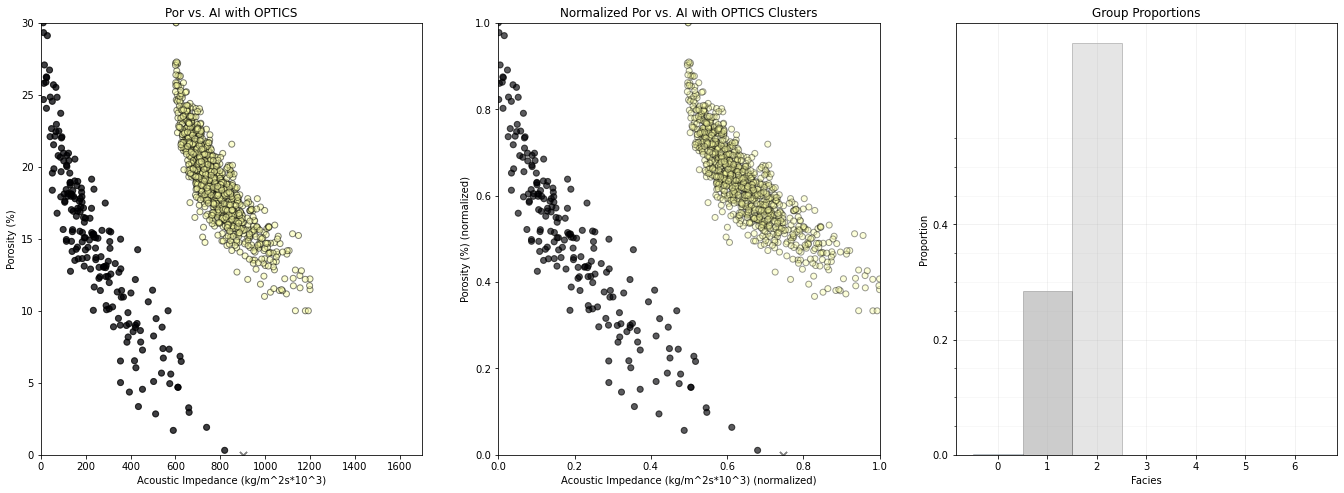

In [11]:
Optics = OPTICS(min_samples=35,  min_cluster_size=0.05,  cluster_method ='xi').fit(df3[['n'+col[0],'n'+col[1]]].values)
df3['OPTICS'] = Optics.labels_ + 1

cmap = plt.cm.inferno

plt.subplot(131)                          
df3_in = df3.loc[(df3['OPTICS'] != 0)]
plt.scatter(df3_in[col[0]], df3_in[col[1]], c=df3_in['OPTICS'], alpha=0.5, edgecolor='k', cmap = cmap)
df3_outlier = df3.loc[(df3['OPTICS'] == 0)]
plt.scatter(df3_outlier[col[0]],df3_outlier[col[1]],c='grey',s = 50,marker = 'x',edgecolor='k',cmap = cmap)
plt.title(col[1] + ' vs. ' + col[0] + ' with OPTICS'); plt.xlabel(xlabel); plt.ylabel(ylabel)
plt.xlim(0,1700)
plt.ylim(ylim)

plt.subplot(132)                     
plt.scatter(df3_in['n'+col[0]], df3_in['n'+col[1]], c=df3_in['OPTICS'], alpha = 0.4, linewidths=1.0, edgecolors="black", cmap = cmap)
plt.scatter(df3_outlier['n'+col[0]],df3_outlier['n'+col[1]],c='grey',s = 50,marker = 'x',edgecolor='k',cmap = cmap)
plt.title('Normalized ' + col[1] + ' vs. ' + col[0] + ' with OPTICS Clusters'); plt.xlabel(xlabel + ' (normalized)'); plt.ylabel(ylabel + ' (normalized)')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.2, top=1.2, wspace=0.2, hspace=0.2)

plt.subplot(133)
N, bins, patches  = plt.hist(df3['OPTICS'],alpha=0.2,edgecolor="black",bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5],range=[0.5,2.5],density = True)
patches[1].set_facecolor('black'); patches[3].set_facecolor('magenta'); patches[4].set_facecolor('red')
patches[5].set_facecolor('yellow'); patches[6].set_facecolor('cyan'); patches[2].set_facecolor('gray');
plt.title('Group Proportions')
plt.xlabel('Facies')
plt.ylabel("Proportion")
ax = plt.gca()
ax.set_xticks(np.arange(0.0, 6.1, 1))
ax.set_yticks(np.arange(0, 0.6, 0.2))
ax.set_yticks(np.arange(0, 0.6, 0.05), minor=True)

#plt.grid(which = 'both',color = 'black',alpha = 0.01)
ax.grid(which='minor', alpha=0.1)
ax.grid(which='major', alpha=0.2)
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.50, wspace=0.2, hspace=0.2)

In this situation, the automatic approach of OPTICS captured the two facies perfectly without assigning an epsilon value as we did in the previous example.

### Results Summary

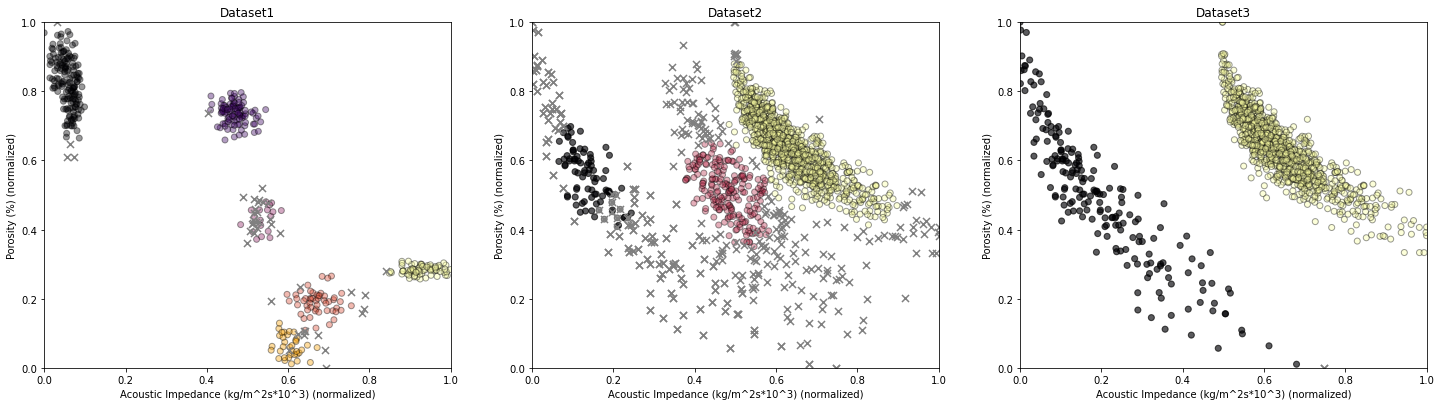

In [12]:
plt.subplot(131)                          
plt.scatter(df_in['n'+col[0]], df_in['n'+col[1]], c=df_in['OPTICS'], alpha = 0.4, linewidths=1.0, edgecolors="black", cmap = cmap)
plt.scatter(df_outlier['n'+col[0]],df_outlier['n'+col[1]],c='grey',s = 50,marker = 'x',edgecolor='k',cmap = cmap)
plt.title('Dataset1'); plt.xlabel(xlabel + ' (normalized)'); plt.ylabel(ylabel + ' (normalized)')
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.subplot(132)                          
plt.scatter(df2_in['n'+col[0]], df2_in['n'+col[1]], c=df2_in['OPTICS'], alpha = 0.4, linewidths=1.0, edgecolors="black", cmap = cmap)
plt.scatter(df2_outlier['n'+col[0]],df2_outlier['n'+col[1]],c='grey',s = 50,marker = 'x',edgecolor='k',cmap = cmap)
plt.title('Dataset2'); plt.xlabel(xlabel + ' (normalized)'); plt.ylabel(ylabel + ' (normalized)')
plt.xlim(0, 1)
plt.ylim(0, 1)


plt.subplot(133)                     
plt.scatter(df3_in['n'+col[0]], df3_in['n'+col[1]], c=df3_in['OPTICS'], alpha = 0.4, linewidths=1.0, edgecolors="black", cmap = cmap)
plt.scatter(df3_outlier['n'+col[0]],df3_outlier['n'+col[1]],c='grey',s = 50,marker = 'x',edgecolor='k',cmap = cmap)
plt.title('Dataset3'); plt.xlabel(xlabel + ' (normalized)'); plt.ylabel(ylabel + ' (normalized)')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.2, top=1.2, wspace=0.2, hspace=0.2)


Datasets 1 and 2 needed hyperparameter tuning since the automatic approach 'xi' of OPTICS did not quite capture the exact number of facies. Thus, the reachability plot is used for that. On the other hand, dataset 3 is a much easier case when it comes to identifying clusters. Therefore, there was no need for inputing the epsilon value and the automatic OPTICS method worked.
One can also conclude a limitation of automatic clustering being the inability to capture intertwined/close-to-each-other facies, as it appeared in datasets 1 and 2. That is why I would always recommend visualizing the reachability plot and compare xi and dbscan clustering methods.


I hope this was helpful,

*Mohammed A.Suaid*

___________________

#### Work Supervised by:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
